In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

data = pd.read_excel(r'final_reduced.xlsx')
data = data.iloc[: , 1:]
data

,co2.em,ch4.cap,n2o.cap,sust.level.ghg,min.temp,min.prec,min.temp.pat,max.temp.pat,prec.pat,sust.level.clim,...,aqi.bucket,sust.level.aqi,country.land,forest.inland.perc,urban.agricult.perc,land.dom,sust.level.land,hdi,hdi.level,sust.level
0,2582389,0.644,0.179,Sustainable,-4.2,2.9,0,0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.303160,human,Not sustainable,0.302,Low,Quite sustainable
1,2490067,0.619,0.175,Sustainable,-5.7,5.0,0,0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.289670,human,Not sustainable,0.307,Low,Quite sustainable
2,1717605,0.586,0.161,Sustainable,-4.7,4.7,0,0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.291497,human,Not sustainable,0.316,Low,Quite sustainable
3,1578188,0.555,0.151,Sustainable,-5.9,3.7,0,0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,58.146280,human,Not sustainable,0.312,Low,Quite sustainable
4,1284149,0.538,0.139,Sustainable,-5.0,7.2,0,0,0,0,...,Moderate,Quite sustainable,652860.0,1.850994,57.962769,human,Not sustainable,0.307,Low,Quite sustainable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,115985250,1.810,0.369,Sustainable,-8.4,0.9,0,0,0,0,...,Moderate,Quite sustainable,447400.0,12.493429,57.898194,human,Not sustainable,0.676,Medium,Quite sustainable
1274,118627503,1.840,0.383,Sustainable,-11.1,0.8,0,0,0,0,...,Moderate,Quite sustainable,447400.0,12.582745,57.499103,human,Not sustainable,0.685,Medium,Quite sustainable
1275,106538178,1.780,0.392,Sustainable,-5.5,1.3,0,0,0,0,...,Moderate,Quite sustainable,444103.0,12.766138,57.535178,human,Not sustainable,0.692,Medium,Quite sustainable
1276,107638705,1.790,0.395,Sustainable,-12.1,0.6,0,0,0,0,...,Moderate,Quite sustainable,448924.0,12.718055,57.996435,human,Not sustainable,0.696,Medium,Quite sustainable


In [2]:
data = data[['sust.level.ghg', 'land.dom']] 
#data = data[['aqi.bucket', 'hdi.level']]
#data = data[['sust.level.ghg', 'hdi.level']] 
#data = data[['sust.level', 'hdi.level']] 
data = data.dropna()

In [3]:
items = set()
for col in data:
    items.update(data[col].unique())
print(items)

{'human', 'Not sustainable', 'Sustainable', 'nature', 'Quite sustainable', 'balance'}


In [4]:
itemset = set(items)
encoded_vals = []
for index, row in data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

ohe_data = pd.DataFrame(encoded_vals)

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(ohe_data, min_support=0.05, use_colnames=True, verbose=1)
freq_items

Processing 18 combinations | Sampling itemset size 3


,support,itemsets
0,0.232394,(nature)
1,0.197183,(balance)
2,0.161972,(Quite sustainable)
3,0.298905,(Not sustainable)
4,0.539124,(Sustainable)
5,0.570423,(human)
6,0.079030,"(nature, Not sustainable)"
7,0.150235,"(Sustainable, nature)"
8,0.072770,"(balance, Not sustainable)"
9,0.095462,"(Sustainable, balance)"


In [6]:
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(nature),(Not sustainable),0.232394,0.298905,0.079030,0.340067,1.137712,0.009566,1.062374
1,(Not sustainable),(nature),0.298905,0.232394,0.079030,0.264398,1.137712,0.009566,1.043507
2,(Sustainable),(nature),0.539124,0.232394,0.150235,0.278665,1.199103,0.024945,1.064145
3,(nature),(Sustainable),0.232394,0.539124,0.150235,0.646465,1.199103,0.024945,1.303622
4,(balance),(Not sustainable),0.197183,0.298905,0.072770,0.369048,1.234667,0.013831,1.111170
5,(Not sustainable),(balance),0.298905,0.197183,0.072770,0.243455,1.234667,0.013831,1.061163
6,(Quite sustainable),(human),0.161972,0.570423,0.129890,0.801932,1.405857,0.037498,2.168842
7,(human),(Quite sustainable),0.570423,0.161972,0.129890,0.227709,1.405857,0.037498,1.085120


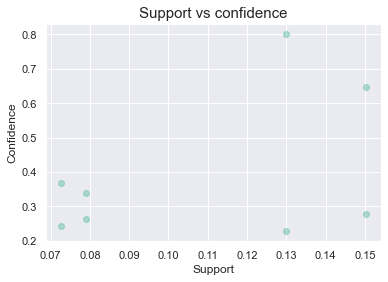

In [7]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs confidence', size=15)
plt.show()

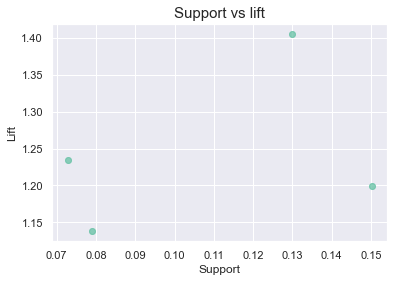

In [8]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs lift', size=15)
plt.show()

Text(0.5, 1.0, 'Lift vs confidence')

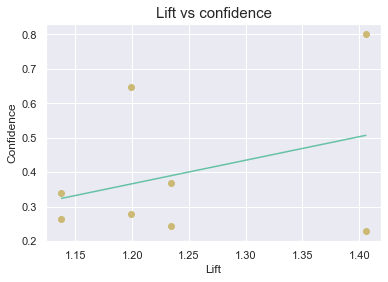

In [9]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs confidence', size=15)